# Lab 3 - Computational Efficiency in numpy
- **Author:** Suraj R. Nair ([suraj.nair@berkeley.edu](suraj.nair@berkeley.edu)) (based on Emily Aiken, Qutub Khan Vajihi and Dimitris Papadimitriou's Labs)
- **Date:** 31st January, 2024
- **Course:** INFO 251: Applied Machine Learning

### Learning Objectives:
By the end of the lab, you will be able to:

* Use key numpy functions for matrix creation and manipulation
* Use vectorization for defining complex matrix operations
* Understand the trade-offs between 'for' loops and vectorized computation

### References:
* [Vectorized Operations](https://www.pythonlikeyoumeanit.com/Module3_IntroducingNumpy/VectorizedOperations.html)
* [Broadcasting in Numpy](https://numpy.org/doc/stable/user/basics.broadcasting.html)
* [Numpy tutorial](https://github.com/rougier/numpy-tutorial)

## I. Introduction to numpy

In [2]:
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
%matplotlib inline

#### Tuples vs. lists vs. arrays vs. matrices

In [3]:
# Tuple
tup = (1, 2, 3)
tup

(1, 2, 3)

In [4]:
# List
lst = [1, 2, 3, "AML", 465.0]
lst

[1, 2, 3, 'AML', 465.0]

In [5]:
# Array
arr = np.array(tup)
arr

array([1, 2, 3])

In [6]:
# 2D Matrix
mat = np.array([[1, 2, 3], [4, 5, 6]])
mat

array([[1, 2, 3],
       [4, 5, 6]])

#### Dimensions

In [7]:
mat.shape

(2, 3)

In [8]:
mat.ndim

2

#### Array manipulation

In [9]:
arr = np.array([1, 2, 3, 4, 5, 7, 9, 11])

In [10]:
print(arr.shape)

(8,)


In [11]:
#cast to 2D
arr.reshape(2, 4)

array([[ 1,  2,  3,  4],
       [ 5,  7,  9, 11]])

In [12]:
#cast to 3D
arr.reshape(2, 2, 2)

array([[[ 1,  2],
        [ 3,  4]],

       [[ 5,  7],
        [ 9, 11]]])

In [13]:
#create 2D Matrix
arr = np.array([[1, 2, 3], [4, 5, 6]])

print(arr.shape)
#Cast to 1D
arr.reshape(-1)

(2, 3)


array([1, 2, 3, 4, 5, 6])

In [14]:
#Other ways to do this:

arr.flatten()

array([1, 2, 3, 4, 5, 6])

In [15]:
arr.ravel()

array([1, 2, 3, 4, 5, 6])

In [16]:
#Change dimensions of a 2 D matrix:
arr = np.array([[1, 2, 3], [4, 5, 6]])
new_arr = arr.reshape(3, 2)
print(arr, new_arr, sep = "\n\n")

[[1 2 3]
 [4 5 6]]

[[1 2]
 [3 4]
 [5 6]]


#### Useful numpy functions

In [17]:
# Arrange - https://numpy.org/doc/stable/reference/generated/numpy.arange.html
np.arange(0, 10, 1)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [18]:
# Linspace - https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
np.linspace(0, 10, 10, endpoint=False)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [19]:
# Logspace - https://numpy.org/doc/stable/reference/generated/numpy.logspace.html
np.logspace(0, 10, 10, endpoint=False, base=2)

array([  1.,   2.,   4.,   8.,  16.,  32.,  64., 128., 256., 512.])

In [20]:
# Zeros - https://numpy.org/doc/stable/reference/generated/numpy.zeros.html
np.zeros(5)

array([0., 0., 0., 0., 0.])

In [21]:
# Ones - https://numpy.org/doc/stable/reference/generated/numpy.ones.html
np.ones(5)

array([1., 1., 1., 1., 1.])

In [22]:
# Full - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.full.html
np.full(5, 12)

array([12, 12, 12, 12, 12])

[array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]]), array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4]])]


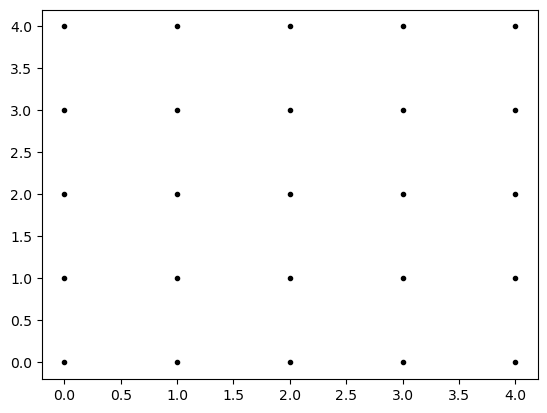

In [23]:
# Meshgrid - https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html
xvalues = np.array([0, 1, 2, 3, 4]);
yvalues = np.array([0, 1, 2, 3, 4]);
print(np.meshgrid(xvalues, yvalues))
xx, yy = np.meshgrid(xvalues, yvalues)
plt.plot(xx, yy, marker='.', color='k', linestyle='none');

#### Useful numpy functions - matrix manipulation

In [24]:
# Vstack - https://numpy.org/doc/stable/reference/generated/numpy.vstack.html
matrix1 = np.array([[1, 2, 3], [1, 2, 3]])
matrix2 = np.array([[5, 6, 7], [5, 6, 7]])
print(matrix1, matrix2, sep = "\n\n")

np.vstack([matrix1, matrix2]) # 2D arrays must have the same 2nd dimension (number of columns)

[[1 2 3]
 [1 2 3]]

[[5 6 7]
 [5 6 7]]


array([[1, 2, 3],
       [1, 2, 3],
       [5, 6, 7],
       [5, 6, 7]])

In [25]:
# Hstack - https://numpy.org/doc/stable/reference/generated/numpy.hstack.html
matrix1 = np.array([[1, 2, 3], 
                    [1, 2, 3]])

matrix2 = np.array([[5, 6, 7], 
                    [5, 6, 7]])

print(matrix1, matrix2, sep = "\n\n")

np.hstack([matrix1, matrix2]) # 2D arrays must have the same 1st dimension (number of rows)

[[1 2 3]
 [1 2 3]]

[[5 6 7]
 [5 6 7]]


array([[1, 2, 3, 5, 6, 7],
       [1, 2, 3, 5, 6, 7]])

In [26]:
# Concatenate - https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html
matrix1 = np.array([[1, 1, 1]])
matrix2 = np.array([[2, 2, 2], [2, 2, 2], [2, 2, 2]])
matrix3 = np.array([[3, 3, 3], [3, 3, 3]])

# Arrays must have the same dimensions except for the concatenation axis
np.concatenate([matrix1, matrix2, matrix3], axis=0) 

array([[1, 1, 1],
       [2, 2, 2],
       [2, 2, 2],
       [2, 2, 2],
       [3, 3, 3],
       [3, 3, 3]])

In [27]:
# Transpose - https://numpy.org/doc/stable/reference/generated/numpy.transpose.html
mat = np.array([[1, 2, 3], [4, 5, 6]])
print(mat, mat.T, sep = "\n\n")

[[1 2 3]
 [4 5 6]]

[[1 4]
 [2 5]
 [3 6]]


## II. Matrix Operations and Broadcasting

#### Matrix addition

In [28]:
# Addition and subtraction -- adding a constant
arr = np.array([[1, 1, 1], [2, 2, 2]])
print(arr)
print('----')
print(arr + 1)

[[1 1 1]
 [2 2 2]]
----
[[2 2 2]
 [3 3 3]]


In [29]:
# Addition and subtraction -- element-wise
arr1 = np.array([[1, 1, 1], [1, 2, 3]])
arr2 = np.array([[2, 2, 2], [3, 4, 5]])
arr1 + arr2

array([[3, 3, 3],
       [4, 6, 8]])

In [30]:
a = np.array([[1, 2, 4], [6, 7, 8]])
b = np.array([[1, 2, 4], [6, 7, 8], [1, 2, 4]])

print(a.shape, b.shape)

(2, 3) (3, 3)


In [31]:
# Addition and subtraction - broadcasting
arr1 = np.array([[1, 1, 1], [1, 2, 3]])
arr2 = np.array([1, 1, 2])
arr1 + arr2

array([[2, 2, 3],
       [2, 3, 5]])

<img src="Images/Br1.png" width=700 height=700 />

In [32]:
# Key rule for broadcasting: the size of the "trailing axes" must be the same (or one must be 1)
arr1 = np.array([0, 10, 20, 30]).reshape(4, 1)
arr2 = np.array([0, 1, 2]).reshape(1, 3)
arr1 + arr2

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

#### Matrix multiplication

In [33]:
# Multiplication by a constant
arr = np.array([[10, 20, 30], [50, 60, 70]])
arr*2

array([[ 20,  40,  60],
       [100, 120, 140]])

<img src="Images/Hadamard.png" width=700 height=700/>

In [34]:
# Element-wise multiplication (Hadamard product)
arr1 = np.array([[3, 5, 7], 
                 [4, 9, 8]])

arr2 = np.array([[1, 6, 3], 
                 [0, 2, 9]])

np.multiply(arr1, arr2)

array([[ 3, 30, 21],
       [ 0, 18, 72]])

<img src="Images/DotProduct.svg" width=700 height=700/>

Does the matrix multiplication in the next block work? Why/ why not?

In [36]:
# Dot product
arr1 = np.array([[3, 5, 7], 
                 [4, 9, 8]])

arr2 = np.array([[1, 6, 3], 
                 [0, 2, 9]])

np.dot(arr1, arr2) 

What about this one?

In [37]:
arr1 = np.array([[1, 2, 3], 
        [4, 5, 6]])

arr2 = np.array([[7, 8], 
        [9, 10], 
        [11, 12]])


assert arr1.shape[1] == arr2.shape[0], "No. of columns in matrix 1 != No. of rows in matrix 2"

np.dot(arr1, arr2) # Key for dot product: First dimension of matrix 1 same as second dimension of matrix 2

array([[ 58,  64],
       [139, 154]])

## III. Vectorized Computation

#### Example 1: Taking the sum of all integers between 1 and 10,000 using a for loop. 

In [42]:
t_start = time.time()

## TODO: Write a for loop to calculate the sum. store your results in a variable called total
total = 0
for i in np.arange(1, 10000):
    total += i

t1 = time.time() - t_start
print(f'The result is {total} computed in {t1} seconds')

The result is 49995000 computed in 0.008321762084960938 seconds


Not too bad, right? Lets try the same operation using NumPy!

In [44]:
t_start = time.time()

# TODO: Write the same function as above, but this time with numpy. Store you results in a variable called total
total = np.sum(np.arange(1, 10000.0))

t2 = time.time() - t_start
print(f'The result is {total} computed in {t2} seconds')

The result is 49995000.0 computed in 0.0 seconds


#### Example 2: Element-wise multiplication

In [48]:
x = np.arange(0, 100000.0, 1)
y = np.arange(0, 100000.0, 1)

In [49]:
def sum_product(x, y):
    """Return the sum of x[i] * y[i] for all indices.
    """
    # using for loop here
    s = 0
    for i in range(len(x)):
        s += x[i] * y[i]
    return s

t_start = time.time()

r = sum_product(x, y)

t_end = time.time()
t1 = t_end - t_start
print(f'The result is {r:.0f} computed in {t1:.3f} seconds')

The result is 333328333350000 computed in 0.041 seconds


Let's do the same thing, but using numpy

In [50]:
t_start = time.time()

# ADD YOUR CODE HERE:
r = np.sum(x*y)

t_end = time.time()
t2 = t_end - t_start
print(f'The result is {r:.0f} computed in {t2:.3f} seconds')

The result is 333328333350000 computed in 0.008 seconds


In [51]:
print(f"{t1 / (t2):.1f} times faster")

5.1 times faster


#### Example 3: Maximizing a complex function

We want to maximize a function $f$ of two variables $(x,y)$:  $f(x, y) = \frac{cos(x^2 + y^2)}{1 + x^2 + y^2}$

To maximize it, we’re going to use a naive grid search:
1. Evaluate $f$ for all $(x,y)$ in a grid on the square
2. Return the maximum of observed values

In [52]:
# The function
def f(x, y):
    return np.cos(x**2 + y**2) / (1 + x**2 + y**2)

In [53]:
# Make a mesh grid for our grid search
X = np.arange(-5, 5, 0.1)
Y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(X, Y)

# Get the values of z at each point in the mesh grid
Z = f(X, Y)

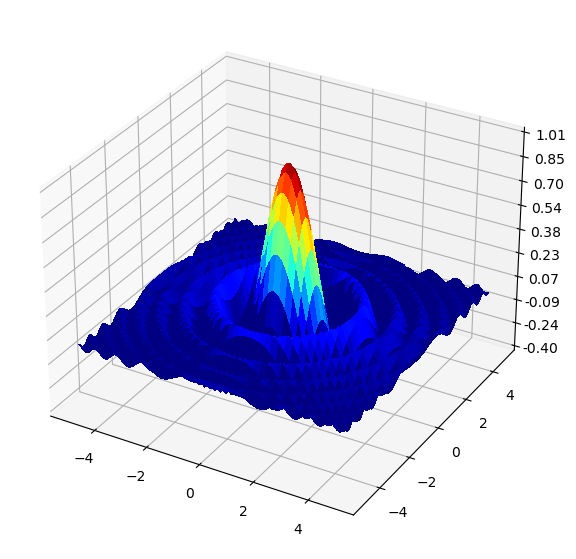

In [54]:
# Create a figure
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(projection='3d')

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, facecolors=cm.jet(Z),
                       linewidth=0, antialiased=False, shade=False)

# Customize the z axis.
ax.set_zlim(-0.4, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
plt.show()

Maximizing the function using for loopss:

In [55]:
X = np.arange(-5, 5, 0.2)
Y = np.arange(-5, 5, 0.1)
m = -np.inf

t_start = time.time()

for x in X:
    for y in Y:
        ## YOUR CODE HERE
        z = f(x, y)
        if z > m:
            m = z          
            
print('The maximum value observed is:',m)
t_end = time.time()
t1 = t_end - t_start
print("Time: {:.5f}s".format(t1))

The maximum value observed is: 1.0
Time: 0.01829s


Maximizing the function using numpy:

In [56]:
t_start = time.time()
# Write the same function using numpy
x, y = np.meshgrid(X, Y)
Z = f(x, y)

#### Add your code here

max_val = np.max(Z)

print('The maximum value observed is:', max_val)
t_end = time.time()
t2 = t_end - t_start
print("Time: {:.5f}s".format(t2))

The maximum value observed is: 1.0
Time: 0.00000s


## Exercises

#### 1. apply v/s np.where

Create a dataset with 2 columns - A, and B. Each column contains random integers from 1 to 100. 

Let the dataset have 1 million rows (reduce this to a smaller number if needed, based on available memory)

In [58]:
data = np.random.randint(1, 100, (10**6, 2))
df = pd.DataFrame(data, columns = list("AB"))

Now, create a new column "category", which takes the value "High" if A > 37, and "Low" otherwise. 

Complete the function "add_category", and use apply() to do this. 

In [59]:
def add_category(x):
    ##### YOUR CODE HERE
    if x > 37:
        return "High"
    else:
        return "Low"
    

t_start = time.time()

##COMPLETE THIS LINE
df['category'] = df['A'].apply(add_category)

t_end = time.time()
t2 = t_end - t_start
print("Time: {:.5f}s".format(t2))

Time: 0.19251s


Now, let's try this using a more efficient approach using np.where()

In [60]:
if 'category' in df.columns:
    df = df.drop(columns = 'category')

t_start = time.time()

##COMPLETE THIS LINE
df['category'] = np.where(df['A'] > 37, "High", "Low")

t_end = time.time()
t2 = t_end - t_start
print("Time: {:.5f}s".format(t2))


Time: 0.08096s


#### 2. Sorting

In [61]:
t_start = time.time()
##COMPLETE THIS LINE. Use the pandas sort_values() function. 
df['A'].sort_values()

t_end = time.time()
t2 = t_end - t_start
print("Time: {:.5f}s".format(t2))


Time: 0.13864s


In [62]:
t_start = time.time()
## Convert the column A to an array, and then sort it using np.sort(). 
# YOUR CODE HERE
arr = df['A'].values
np.sort(arr)

t_end = time.time()
t2 = t_end - t_start
print("Time: {:.5f}s".format(t2))


Time: 0.07329s


#### Experimental comparison between numpy and built-in python functions

<img src="Images/Comparison.png" width=700 height=700 />

## Appendix: Additional numpy functions

### Unary Functions
A mathematical function that only accepts one operand (i.e. argument): f(x)

<img src="Images/Unary.png" width=500 height=500 />

### Binary Functions
A mathematical function that only accepts two operands: f(x,y).
There are two cases that we must consider when working with binary functions, in the context of NumPy arrays:

* When both operands of the function are arrays (of the same shape).
* When one operand of the function is a scalar (i.e. a single number) and the other is an array.

<img src="Images/Binary.png" width=700 height=700 />

### Sequential Functions
A sequential function expects a variable-length sequence of numbers as an input, and produces a single number as an output.

<img src="Images/Seq.png" width=700 height=700 />